<a href="https://colab.research.google.com/github/Turjoy-Mz/Lab_01_Turjoy/blob/main/2021_2_60_072_Lab_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install the Kaggle library
!pip install kaggle

# Upload your kaggle.json file (contains API key)
from google.colab import files
files.upload()  # Choose your kaggle.json file from your computer

# Move kaggle.json to the correct directory
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json  # Change file permissions


Saving kaggle.json to kaggle.json


In [2]:
# Download the dataset from Kaggle using the link's identifier
!kaggle datasets download -d aryashah2k/mango-leaf-disease-dataset

# Unzip the downloaded dataset
import zipfile
import os

zip_path = 'mango-leaf-disease-dataset.zip'
extract_dir = 'MangoLeaf_Dataset/'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# Check extracted files
os.listdir(extract_dir)


Dataset URL: https://www.kaggle.com/datasets/aryashah2k/mango-leaf-disease-dataset
License(s): Attribution-NonCommercial 4.0 International (CC BY-NC 4.0)
 98% 101M/103M [00:01<00:00, 97.8MB/s]
100% 103M/103M [00:01<00:00, 93.6MB/s]


['Bacterial Canker',
 'Powdery Mildew',
 'Anthracnose',
 'Healthy',
 'Gall Midge',
 'Sooty Mould',
 'Die Back',
 'Cutting Weevil']

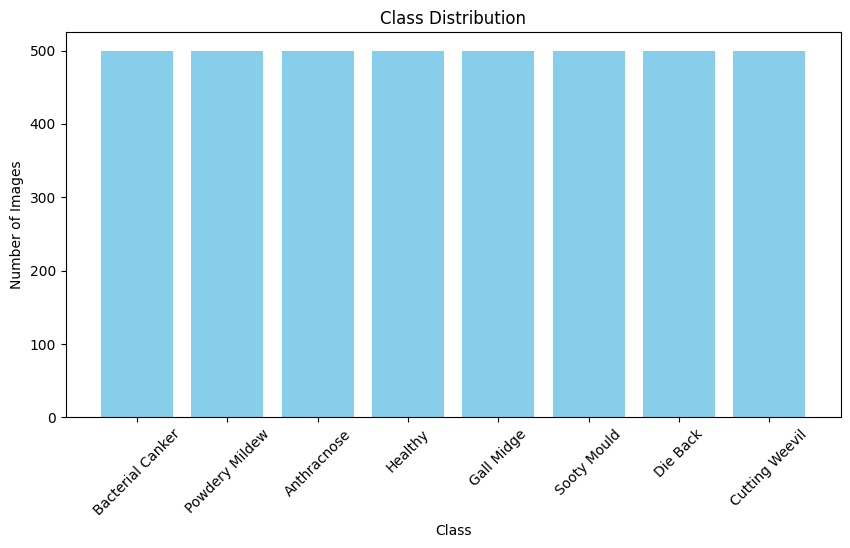

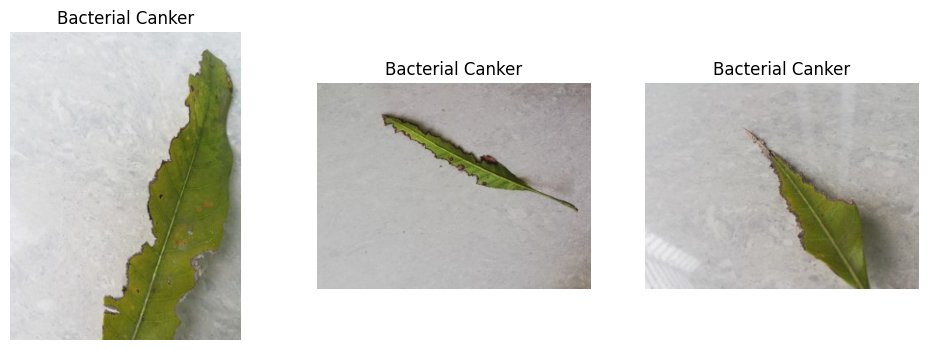

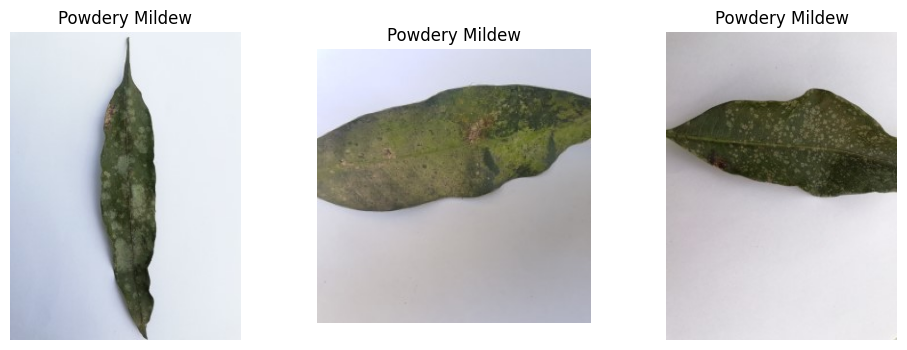

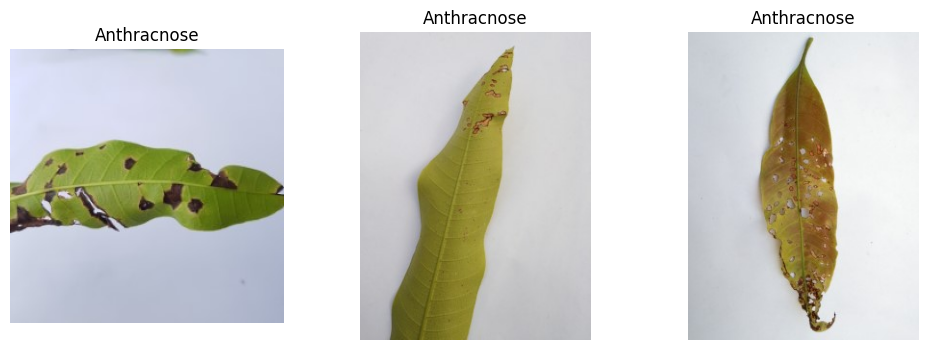

In [5]:
import os
from collections import Counter
import matplotlib.pyplot as plt
import cv2

# Define the dataset path
dataset_path = '/content/MangoLeaf_Dataset'

# Check for classes in the dataset
classes = os.listdir(dataset_path)
class_counts = {cls: len(os.listdir(os.path.join(dataset_path, cls))) for cls in classes}

# Plot class distribution
plt.figure(figsize=(10, 5))
plt.bar(class_counts.keys(), class_counts.values(), color='skyblue')
plt.xticks(rotation=45)
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.show()

# Display sample images for each class
for cls in classes[:3]:  # Show 3 classes as an example
    folder_path = os.path.join(dataset_path, cls)
    sample_images = os.listdir(folder_path)[:3]  # Show 3 images per class

    plt.figure(figsize=(12, 4))
    for i, img_name in enumerate(sample_images):
        img_path = os.path.join(folder_path, img_name)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(1, 3, i+1)
        plt.imshow(img)
        plt.title(cls)
        plt.axis('off')
    plt.show()

In [6]:
import numpy as np
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input

# Initialize VGG16 model for feature extraction
model = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

def preprocess_and_extract(img_path):
    img = image.load_img(img_path, target_size=(128, 128))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    features = model.predict(img_array)
    return features.flatten()

# Extract features and labels
X, y = [], []

for cls in classes:
    folder_path = os.path.join(dataset_path, cls)
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        features = preprocess_and_extract(img_path)
        X.append(features)
        y.append(cls)

X = np.array(X)
y = np.array(y)


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 515ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step
1/1 ━━━━━━━━━

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

# Train Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Decision Tree Accuracy: 0.82625
                  precision    recall  f1-score   support

     Anthracnose       0.80      0.67      0.73       112
Bacterial Canker       0.96      0.86      0.91       123
  Cutting Weevil       0.95      0.98      0.96        93
        Die Back       0.85      0.91      0.88        91
      Gall Midge       0.76      0.78      0.77       104
         Healthy       0.86      0.89      0.87       101
  Powdery Mildew       0.77      0.78      0.77        86
     Sooty Mould       0.66      0.76      0.70        90

        accuracy                           0.83       800
       macro avg       0.83      0.83      0.83       800
    weighted avg       0.83      0.83      0.83       800

Random Forest Accuracy: 0.9675
                  precision    recall  f1-score   support

     Anthracnose       0.99      0.93      0.96       112
Bacterial Canker       1.00      1.00      1.00       123
  Cutting Weevil       1.00      1.00      1.00        93
     

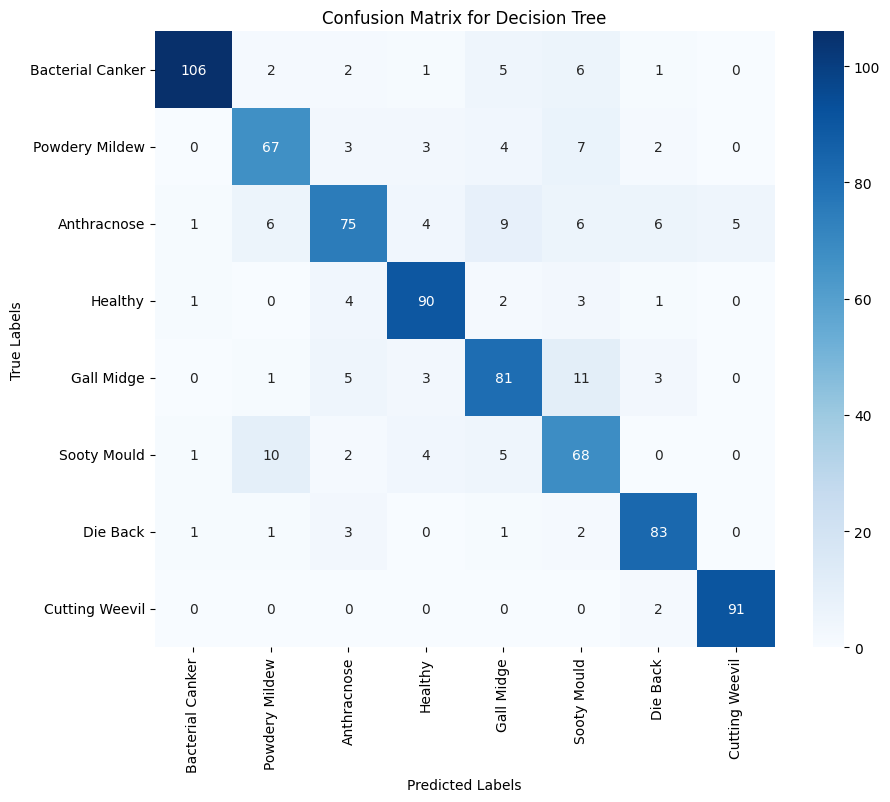

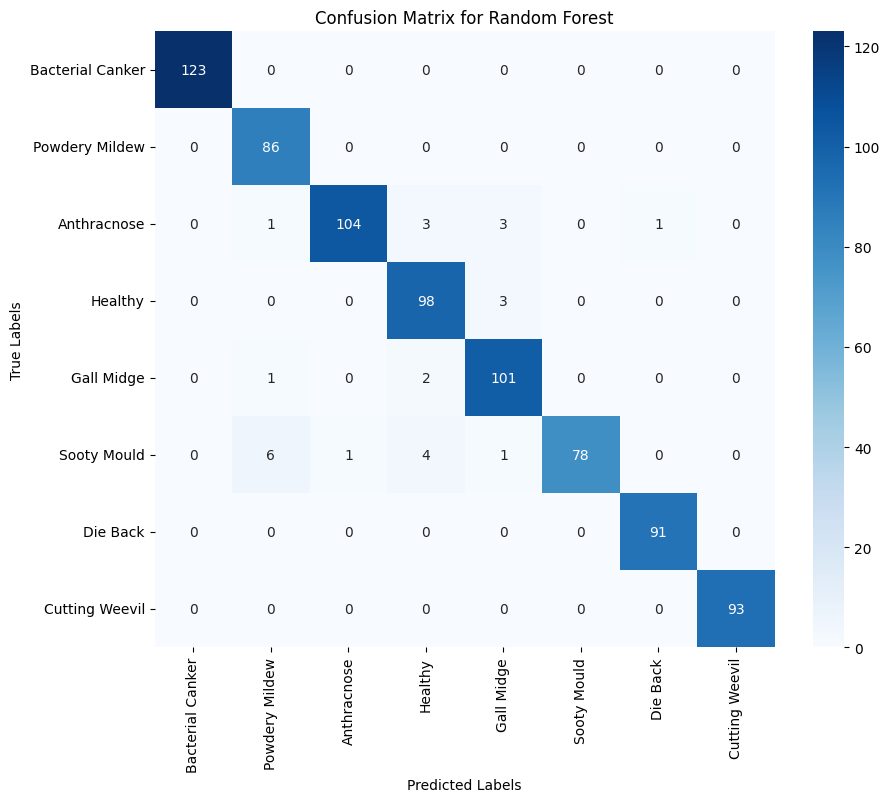

In [8]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred, labels=classes)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title(f"Confusion Matrix for {model_name}")
    plt.show()

# Plot for Decision Tree
plot_confusion_matrix(y_test, y_pred_dt, "Decision Tree")

# Plot for Random Forest
plot_confusion_matrix(y_test, y_pred_rf, "Random Forest")


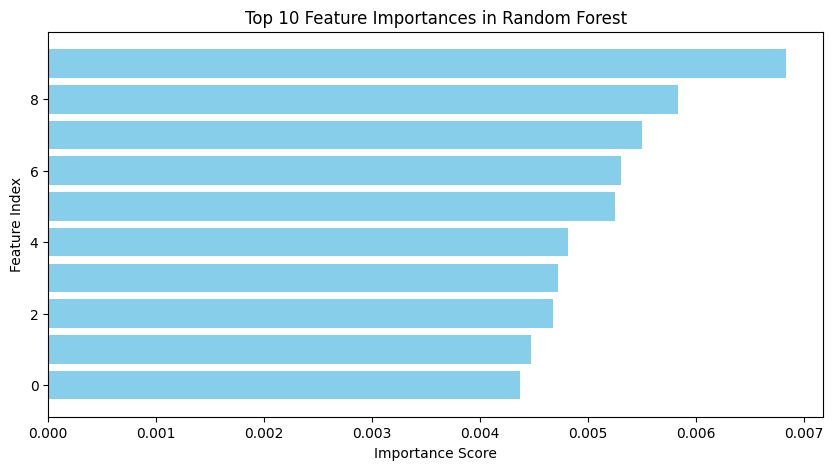

In [9]:
# Get feature importances from the Random Forest model
importances = rf_model.feature_importances_
indices = np.argsort(importances)[-10:]  # Select top 10 important features

plt.figure(figsize=(10, 5))
plt.title("Top 10 Feature Importances in Random Forest")
plt.barh(range(len(indices)), importances[indices], color='skyblue', align='center')
plt.xlabel("Importance Score")
plt.ylabel("Feature Index")
plt.show()

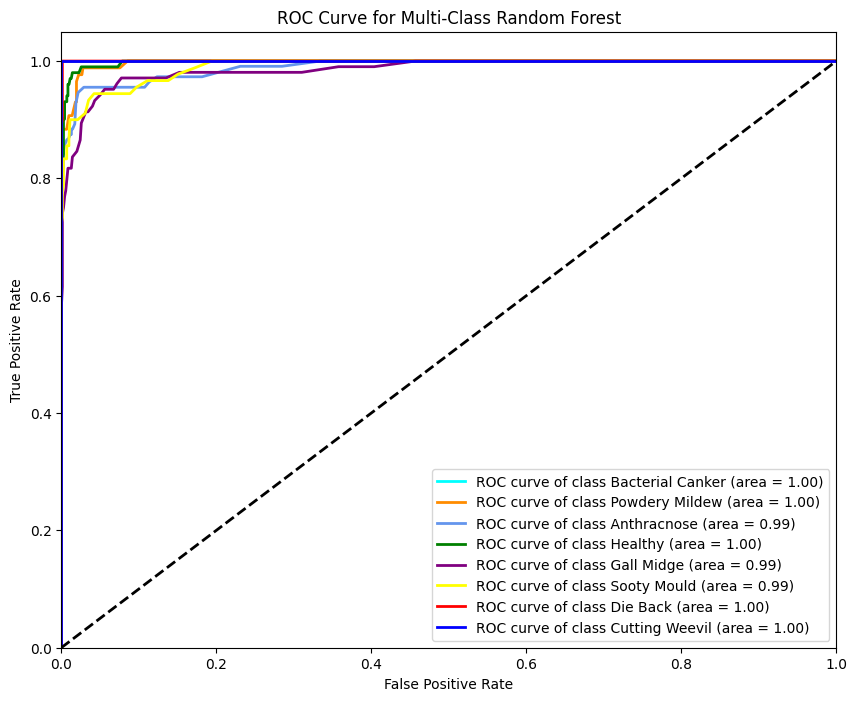

In [12]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from itertools import cycle

# Binarize labels for multi-class ROC curve
y_test_bin = label_binarize(y_test, classes=classes)
n_classes = y_test_bin.shape[1]

# One-vs-Rest (OvR) for Random Forest
rf_classifier = OneVsRestClassifier(RandomForestClassifier(random_state=42))
rf_classifier.fit(X_train, label_binarize(y_train, classes=classes))
y_score = rf_classifier.predict_proba(X_test)

# Plot ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotting
plt.figure(figsize=(10, 8))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'purple', 'yellow', 'red', 'blue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'ROC curve of class {classes[i]} (area = {roc_auc[i]:0.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-Class Random Forest')
plt.legend(loc="lower right")
plt.show()
